#  <center>RECONNECT</center>
## <center>*Report for e-science course* </center>

## Abstract
text text text

## Acknowledgements
Data
Group members+supervisors
Scripts

## Introduction

The Artcic has during the last decades experienced a faster warming than any other part of the globe [REF]. The response to increased temperature in the Arctic environment implies reduction of sea ice cover and glaciers, melting permafrost and ecological pressure on the Arctic environment and species [REF]. Moreover, the interaction between the atmosphere, ocean and land is affected [bla bla marine production etc…………….]. 

The Arctic is in many ways an extreme environment which is also reflected in the annual cycle of airborne particulate matter. During the dark months, ocean and air circulation patterns implies an influx of anthropogenic pollutants, and the aerosol size distribution is dominated by accumulation mode particles. In combination with the Arctic wintertime meteorological conditions, this leads to the formation of a persistent Arctic haze. As the sun gradually returns, the circulation and airmass transport patterns changes and the anthropogenic pollution inflow is restricted [REF]. Formation of low-level clouds during summertime leads to removal of accumulation mode particles by wet scavenging marks the end of the Arctic Haze period [REF]. Consequently, the composition, properties, and size distribution of Arctic aerosol particle change. The lower aerosol load and increased availability of sunlight promotes photochemistry and results in a peak of in aerosol particles smaller than 100 nm [REF]. [Blab la NPF + precursor gases]
 At the Zeppelin mountain station [add location] long- term measurements are conducted to monitor the properties of aerosol particles, gaseous species and meteorological parameters (?). Long term measurements are valuable to discern changes…….


## Method

text text text

Describe what DMPS is and what bins are etc, cant be sassumed that reader knows what it is. Describe Zeppelin. 

### Import packages

And make sure that functions are auto-updated.

In [1]:
import DMPS_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns
import scipy as sc
import glob 
import sklearn.metrics as skm
from sklearn import metrics
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
import scipy.stats as st
import seaborn as sns

# Auto-update the functions. Useful if the functions have been altered. 
%load_ext autoreload
%autoreload 2

In [2]:
# Defining the path containg all DMPS data
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
# Using glob to import the files in the specified path
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

Loading each year of 30 min resolution DMPS data into a dataframe and create a list containing all dataframes.
Column headings are added, and data flagged as invalid is removed.

In [4]:
DFs_DMPS = fu.load_and_append_DMPS(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

### Concatenate DMPS data 
From the list containg one datafram per year, one datframe containg data from all years is created. The columns headings for the bin midpoint diameters are given in the  are renamed to names that are easier to handle

In [5]:
# Concatenate all the dataframes in list DFs_DMPS to one dataframe and drop unnessesary columns.
df_DMPS = fu.concat_df_DMPS(DFs_DMPS)

Define useful variables and rename the column headings to ease calling of specific columns:

In [6]:
# Get a list with the DMPS bin column names as strings 
bin_col_list = fu.get_bin_column_string_list()

# Rename the column headings for midpoint diameters to numeric values with less decimals.
df_DMPS = fu.renameDpColumns(df_DMPS, bin_col_list)

# Make a list of all the "real" non-rounded midpoint diameters as a list and as array.
diameterList, diameters = fu.getFloatDiameterListAndArray()

# Make a list of diameters as string-objects
diameters_as_strings = [str(x) for x in diameters]

### Resampling 
The function ``resample`` was used to convert the 30 min DMPS data to dataframes containing the daily mean, median and 1 hour average. The python function ``resample`` fills the gaps in the data by adding rows for gap days/months/hours with NaN-values to get a continous dataset. Because of this, rows containing only NaN values are dropped. 

In [7]:
df_daily_2010_2020_mean   = df_DMPS.resample('D').mean()
df_daily_2010_2020_mean   = df_daily_2010_2020_mean.dropna(how='all')

df_daily_2010_2020_median = df_DMPS.resample('D').median()
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all') 

df_hourly_2010_2020_mean  = df_DMPS.resample('H').mean()
df_hourly_2010_2020_mean  = df_hourly_2010_2020_mean.dropna(how='all')

Describe what the columns are in the data? Maybe this should be done at an earlier stage..

### Methods to identify NPF events
Some different methods are tested to identify the NPF events: 
* By calculation of $\frac{N_{D_p<10nm}}{N_{tot}}$ 
* By using K-means clustering
* By calculating the difference between the UF-CPC and the CPC 

The first method requires that the total number concentration $N_{tot}$ is calculated for a given diameter range. For that the log-normal distribution which is provided by the DMPS have to be integrated. Linn Karlsson (e-Science course participant 2017) should be acknowledged for inspiration to the method used in this work (Linn's method invloved the use of dictionaries but here arrays are used instead).  

The ``calcNtot`` calculates the particle concentration by integrating in a given bin midpoint diameter interval and adds a column in the dataframe containg the calculated values. 

In [8]:
# Calculate the total particle number concentration for:

# Daily median
df_daily_2010_2020_median_ntotCalc = fu.calcNtot(diameters, df_daily_2010_2020_median,diameters_as_strings)

# 30 min resolution data
df_DMPS_ntotCalc                   = fu.calcNtot(diameters, df_DMPS,diameters_as_strings) 

# 1 h resolution data
df_hourly_2010_2020_mean_ntotCalc  = fu.calcNtot(diameters, df_hourly_2010_2020_mean,diameters_as_strings) 

### Quality control of calcNtot function for 1h data

R-squared: 0.999363
Intercept: 0.0445901316076629
Slope: 1.0004705430431775


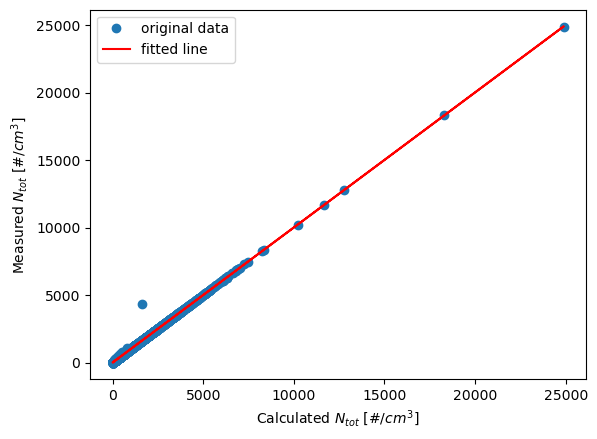

In [9]:
varx = df_hourly_2010_2020_mean_ntotCalc['NtotCalc'].values
vary = df_hourly_2010_2020_mean_ntotCalc['Ntot'].values

fu.compareIntegration(varx,vary)

### Compare $N_{D_P <x}/N_{tot}$ and compare UFCPC CPC

Integration of lognormal size distribution --> ($N_{D_P <x}$) 

The aim is to calculate the total particle number concentration (#/$cm^3)$ up to $x$ nm ($N_{D_P <x}$) and compute $N_{D_P <x}/N_{tot}$ to identify NPF events.  

In [10]:
bin_cols = fu.get_bins(bin_col_list)
bin_cols = [float(x) for x in bin_cols]

## K-means clustering

The purpose of using the K-means clustering is to identify NPF events in the long-term DMPS dataset. This approach was previously deployed by Dall'Osto et al. (2017). **Describe why and how. Shortly.**

Prior to applying the K-means clustering the size distribution data must be normalized, and the optimal numbers of clusters needs to be determined. Normalization of DMPS size distributions implies clustering by shape.  

### Normalizing the size distributions

In [11]:
df1, df_daily_2010_2020_median_norm = fu.create_normalised_df(df_daily_2010_2020_median)
df2, df_daily_2010_2020_mean_norm = fu.create_normalised_df(df_daily_2010_2020_mean)
df3, df_daily_2010_2020_1h_mean_norm = fu.create_normalised_df(df_hourly_2010_2020_mean)

For the hourly averaged data some endpoint columns where dropped in order for the clustering to work. Apparently the K-means method is very sensitive to the concentrations in the endpoints. This might indicate that the clustering method is not too robust. Normally particle number concentrations are low in the end bins, and by dropping them it is reasonable to assume that the overall size distribution shape should be preserved anyhow.  

In [12]:
df_hourly_norm_dropped = df_daily_2010_2020_1h_mean_norm.copy()
df_hourly_norm_dropped = df_hourly_norm_dropped.drop \
                         (columns=['norm5.012','norm630.957','norm707.946'])

### Optimizing the number of clusters 

The optimal cluster number *k* for K-means clustering needs to be decided upon. This could be done using several methods. Here the inertia method and the average silhouette score is used. 

The inertia method implies calculating the mean squeared distance of each clusters to its nearest centroid **mening?** A good clustering model has a low inertia and low number of clusters. If *k* = number of clusters equals the number datapoints the inertia equals zero, so while choosing the optimal *k* there is a trade off between inertia and number of clusters. To find the optimal *k* the elbow should be identified, where the increase in *k* implies a slower decrease in inertia. 

The Silouette score generates a number between -1 and 1. The closer the Silouette score is to 1, the better cluster are distiguished from each other. A score of 0 implies that clusters are not well distinguished and -1 that clusters are wrongly assigned. Here, the average silouette score is computed which informs on the average spearation of all clusters. Ideally the Silouette score is calulated for individual samples as well (out of the scope of this work) to optimize the choice of *k*.   

In [13]:
def optimizeClusters(df_hourly_norm_dropped):
    '''Compute the inertia (elbow method) and the average silouette score
    to choose optimal number of clusters.'''

    test_n_of_cluster = [2,3,4,5,6,7,8,9,10,11,12,13]
    av_sil_score_list = []
    inertia_list = []

       
    for n_clusters in test_n_of_cluster:
        
        df = df_hourly_norm_dropped.copy()
        #Compute the average silhouette score, inertia and cluster data
        av_sil_score, inertia, df_norm_clustered = fu.perform_clustering(df, n_clusters)
        
        # Define the unique number of size distribution clusters in the sence that peak diameter is different.
        clusters = np.unique(df_norm_clustered['clusters'].values)

        # Add average siloutte scores to list for plotting later
        av_sil_score_list.append(av_sil_score)

        # Add inertia to intertia list
        inertia_list.append(inertia)
        
        # Check that the number of clusters resulting from the clustering procedure is equal to the variable ``n_clusters``, 
        # i.e. that the peak diameters of the clustered size distributions are unique. 
        #fu.checkUniqueModeDiam(df_norm_clustered,n_clusters)
        
    #Plot the inertia and average silhouette score
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot of interia
    ax.plot(test_n_of_cluster,
            inertia_list,
            color="red", 
            marker="o",
            label = 'Inertia')
    # set x-axis label
    ax.set_xlabel("Number of clusters", fontsize = 16)
    # set y-axis label
    ax.set_ylabel("Inertia",
                  color="red",
                  fontsize=16)

    # Add second y-axis for average Siloutte score
    # twin object for two different y-axis on the sample plot
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(test_n_of_cluster,
             av_sil_score_list,
             color="blue",
             marker="x",
             label = 'Average Siloutte Score')
    ax2.set_ylabel("Average Silhoutette Score",color="blue",fontsize=16)
    
    plt.show()     
        
    return

# optimizeClusters(df_hourly_norm_dropped)
    

From the inertia method it is not straightforward to define the elbow, where adding more clusters results in a minor decrease of inertia. It is clear that the average silhoutette score of the clusters decrease with increasing number of clusters.
The optimal cluster number was here decided to *k* = 5, rather than 4 as inertia decrease less for each added cluster when *k*>4. Six clusters did not improve the silouette score and five clusters is prefered over seven as inertia is higher when *k*=5. 

### Clustering the size distributions
Following the optimization procedure the clustering was performed.

In [14]:
# Optimal cluster number 
n_clusters = 5

#Perform K-means clustering
silhouette_avg_median, inertiaMedian, df_norm_clustered_median = fu.perform_clustering(df_daily_2010_2020_median_norm, n_clusters)
silhouette_avg_mean, inertiaMean, df_norm_clustered_mean = fu.perform_clustering(df_daily_2010_2020_mean_norm, n_clusters)

silhouette_avg_1h, inertia1h, df_norm_clustered_1h_mean = fu.perform_clustering(df_hourly_norm_dropped, n_clusters)

# Define the unique number of size distribution clusters in the sence that peak diameter is different.
clusters = np.unique(df_norm_clustered_1h_mean['clusters'].values)

# Check that the number of clusters resulting from the clustering procedure is equal to the variable ``n_clusters``, 
# i.e. that the peak diameters of the clustered size distributions are unique. Print result.
fu.checkUniqueModeDiam(df_norm_clustered_1h_mean,n_clusters)

OK! Clusters peak for different diameter when number of clusters =  5


Each hourly distribution was assigned a cluser ID during the clustering. Define the mean, standard devitation, median, 10- and 90-percentiles of the clustered data for each cluster in order to visulize the results of the clustering procedure. 

In [15]:
df_norm_clustered_1h_mean_median = df_norm_clustered_1h_mean.groupby('clusters').median()
df_norm_clustered_1h_10q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.1)
df_norm_clustered_1h_90q         = df_norm_clustered_1h_mean.groupby('clusters').quantile(.9)

df_norm_clustered_1h_mean_mean   = df_norm_clustered_1h_mean.groupby('clusters').mean()
df_norm_clustered_1h_std         = df_norm_clustered_1h_mean.groupby('clusters').std()

Plot the mean +/- 1$\sigma$ of the normalized and clustered size distribution data. The median is plotted as a dotted line for comparision.

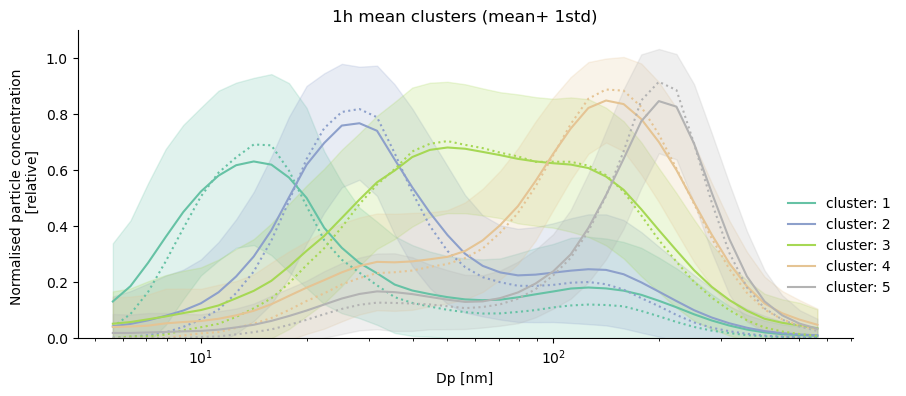

In [16]:
fu.plotClustersNormalized(df_norm_clustered_1h_mean, diameters,
                          df_norm_clustered_1h_mean_mean, df_norm_clustered_1h_std,
                          df_norm_clustered_1h_mean_median)

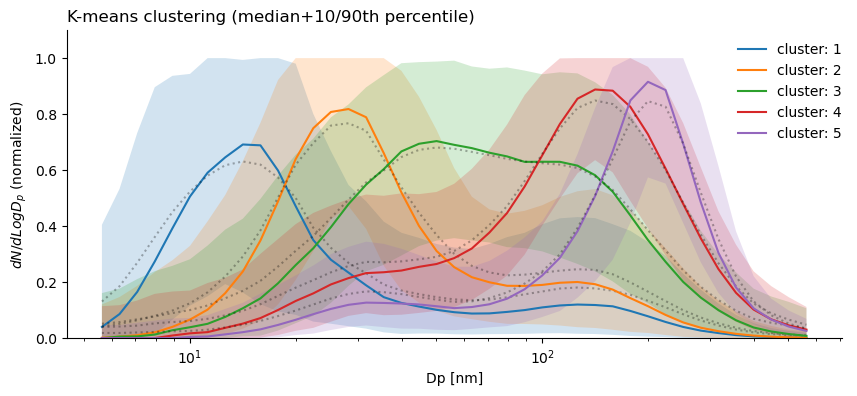

In [17]:
# Median 1h mean clusters----------------------------------------------


fig, ax = plt.subplots(figsize=(10,4))


for cluster in clusters:
    #print(cluster)
    df_cluster = df_norm_clustered_1h_mean_median[df_norm_clustered_1h_mean_median.index == cluster]
    df_cluster_mean = df_norm_clustered_1h_mean_mean[df_norm_clustered_1h_mean_mean.index == cluster]
    df_cluster90 = df_norm_clustered_1h_90q[df_norm_clustered_1h_90q.index == cluster]
    df_cluster10 = df_norm_clustered_1h_10q[df_norm_clustered_1h_10q.index == cluster]
    
    ax.plot(diameters[1:-2]*10**9, df_cluster.iloc[0,:].values, '-', 
            label='cluster: '+str(cluster))
    ax.fill_between(diameters[1:-2]*10**9, 
                    df_cluster90.iloc[0,:].values,
                    df_cluster10.iloc[0,:].values,
                    alpha=0.2, )
    
    
    # Plot the mean to see similarity
    ax.plot(diameters[1:-2]*10**9, df_cluster_mean.iloc[0,:].values, 'k:',alpha=0.3)
    #ax.set_xticks(bin_cols[::5])
    ax.set_xscale('log')
    ax.set_ylim(0,1.1)
    

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
    ax.spines[spine].set_linewidth(0.5)
    
plt.xlabel('Dp [nm]')
plt.title('K-means clustering (median+10/90th percentile)', loc='left')
plt.ylabel('$dN/dLogD_p$ (normalized)')
plt.legend(frameon=False,bbox_to_anchor=(.85, 1))
plt.show()

In [18]:
#df_cluster.iloc[0,:].values

In [19]:
#df_norm_clustered_1h_90q

### Look at trends in 1h mean data 

An important conclusion is that the integration method was not succesful for the choice of thresholds equal to 10,20 or 30 nm. The annual trends showed peak in the dark months and therefore this method is discarded.

Taking the ration between the UF CPC and normal CPC to identify NPF was also dicarded as taking ratios between numbers with small differences makes it hard to discearn differences (?). 

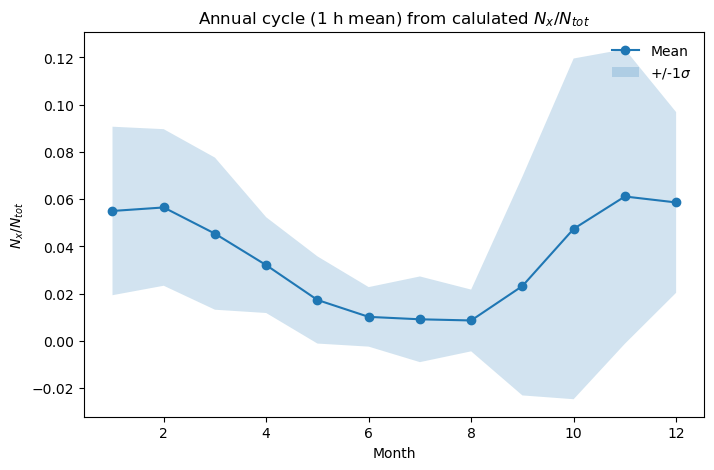

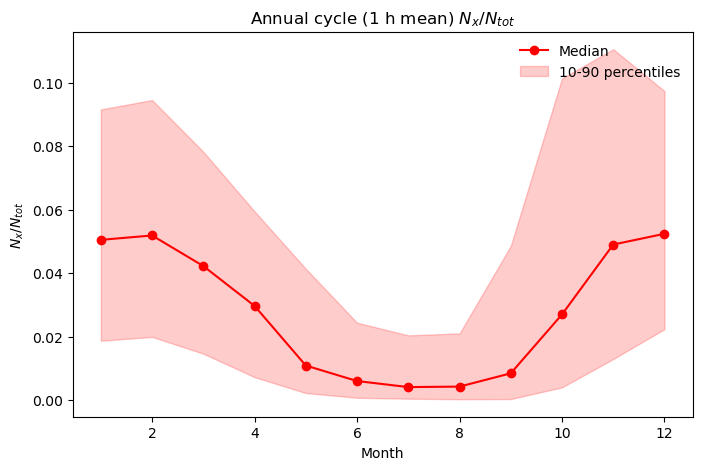

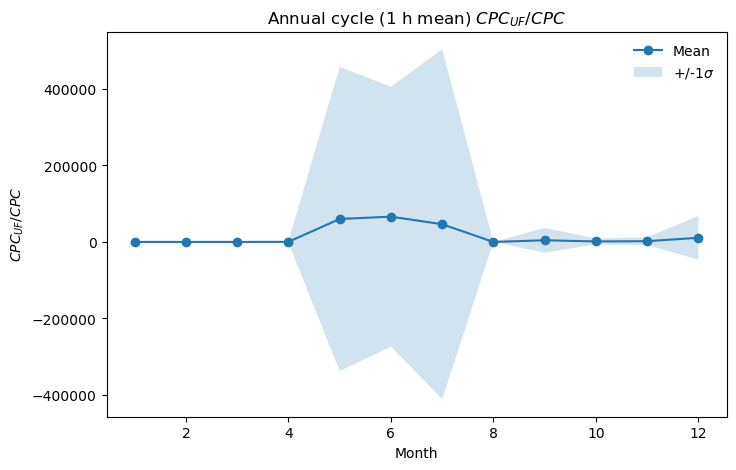

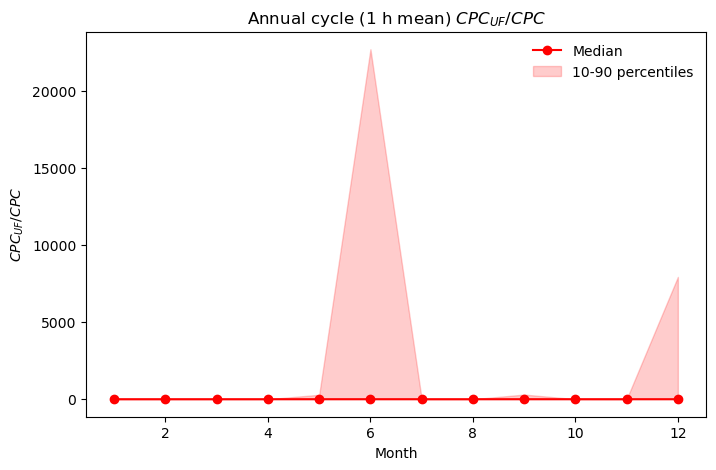

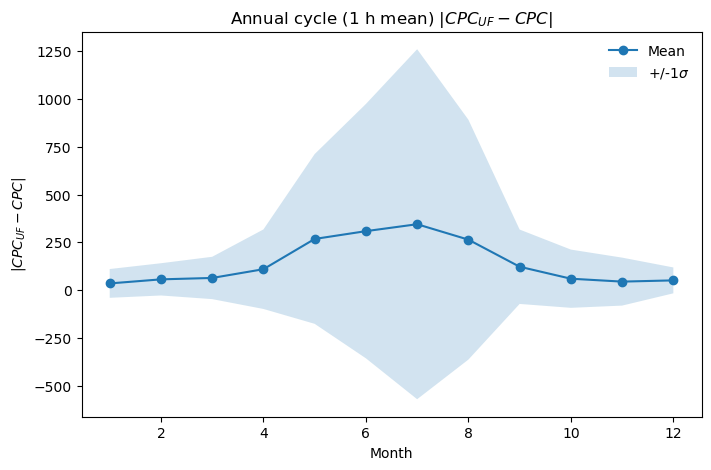

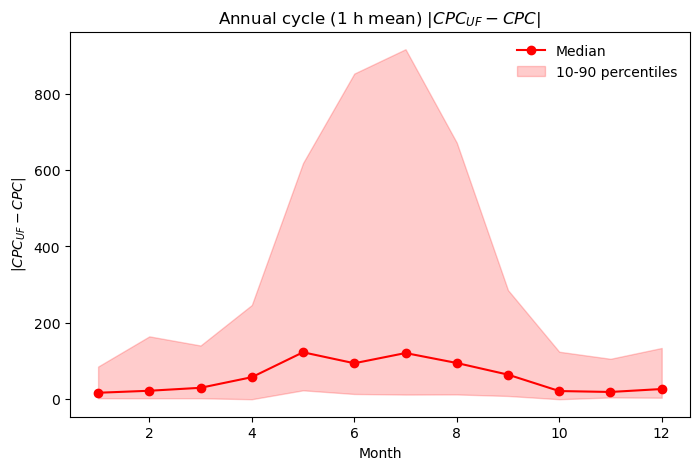

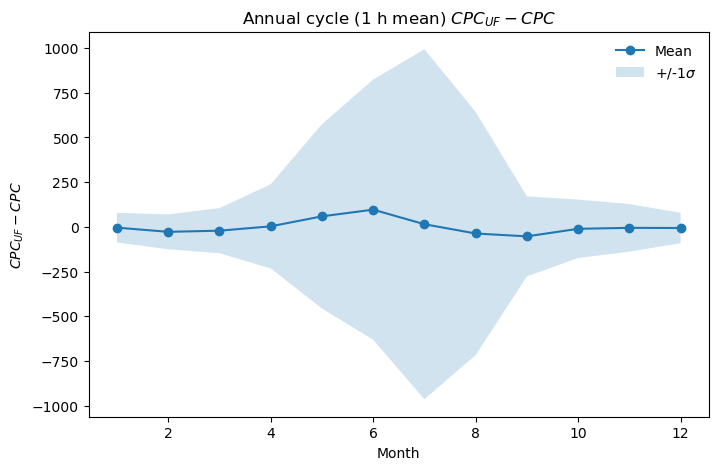

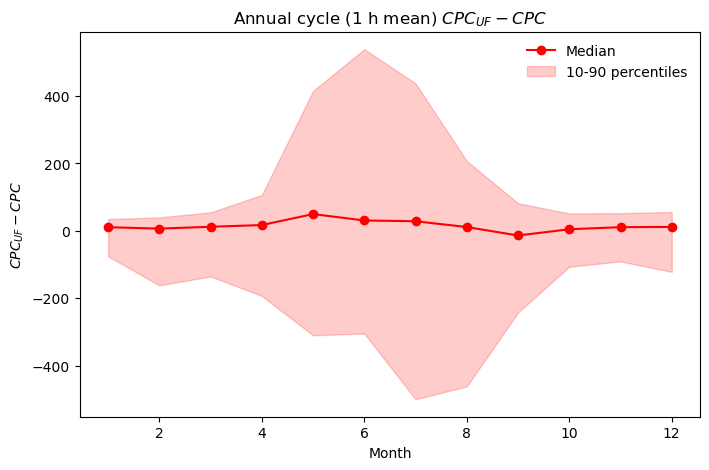

In [20]:
# Create temporary copy
df_tmp = df_hourly_2010_2020_mean.copy(deep = True)
# df_tmp = df_tmp.drop(columns=['UFCPC','CPC3010','Ntot','flag'])
# # =['UFCPC','5.012','630.957','707.946','CPC3010','Ntot','flag'])

# In temporary copy of mean data add columns: 


# Create Nx/Ntot for 1 h mean data
threshold = 10
bin_cols_LTnm = [x for x in bin_cols if x < threshold]

df_tmp = fu.calcNtot(diameters[:len(bin_cols_LTnm)+1], df_tmp,diameters_as_strings)
df_tmp_nxntot = df_tmp.copy(deep = True)

df_tmp_nxntot['NxNtot'] = df_tmp_nxntot['NtotCalc']/df_tmp_nxntot['Ntot']

# Drop NaN:s
df_tmp_nxntot = df_tmp_nxntot.dropna(subset =['NxNtot'])

# Look at annual cycle for NxNtot
df_tmp_nxntot_mean = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).mean()
df_tmp_nxntot_std = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).std()

df_tmp_nxntot_median = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).median()
df_tmp_nxntot_10q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.1)
df_tmp_nxntot_90q = df_tmp_nxntot['NxNtot'].groupby(df_tmp_nxntot.index.month).quantile(0.9)

# Create UF CPC/CPC ratio for 1 h mean data
df_tmp_rat =  df_tmp.copy(deep = True)
df_tmp_rat['ratio_CPCs'] = df_tmp_rat['UFCPC']/df_tmp_rat['CPC3010']

# Drop NaN:s
df_tmp_rat = df_tmp_rat.dropna(subset =['ratio_CPCs'])
# Drop zeros
df_tmp_rat= df_tmp_rat[df_tmp_rat['UFCPC'] != 0]
df_tmp_rat= df_tmp_rat[df_tmp_rat['CPC3010'] != 0]

df_1h_annual_cycle_rat_mean = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).mean()
df_1h_annual_cycle_rat_std = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).std()
8
df_1h_annual_cycle_rat_median = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).median()
df_1h_annual_cycle_rat_10q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.1)
df_1h_annual_cycle_rat_90q    = df_tmp_rat['ratio_CPCs'].groupby(df_tmp_rat.index.month).quantile(0.9)

# Create absolute diff Uf cpc - cpc----------------------------------------------------------

df_tmp['abs_diff'] = np.absolute(df_tmp['UFCPC']-df_tmp['CPC3010'])

df_tmp_adiff = df_tmp.copy(deep = True)

# Drop NaN's
df_tmp_adiff = df_tmp_adiff.dropna(subset =['abs_diff'])

df_1h_annual_cycle_adiff_mean = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).mean()
df_1h_annual_cycle_adiff_std = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).std()

df_1h_annual_cycle_adiff_median = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).median()
df_1h_annual_cycle_adiff_10q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.1)
df_1h_annual_cycle_adiff_90q = df_tmp_adiff['abs_diff'].groupby(df_tmp_adiff.index.month).quantile(0.9)

# Create diff UFcpc and cpc----------------------------------------------------------

df_tmp['diff_cpcs'] = df_tmp['UFCPC']-df_tmp['CPC3010']

# Drop NaN's

df_tmp_diff = df_tmp.copy(deep = True)
df_tmp_diff = df_tmp_diff.dropna(subset =['diff_cpcs'])

df_1h_annual_cycle_diff_mean = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).mean()
df_1h_annual_cycle_diff_std = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).std()

df_1h_annual_cycle_diff_median = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).median()
df_1h_annual_cycle_diff_10q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.1)
df_1h_annual_cycle_diff_90q = df_tmp_diff['diff_cpcs'].groupby(df_tmp_diff.index.month).quantile(0.9)

#--------------------------------------------------------------------------------------------------


# Plot ratios from calculated area ratio
fig1,axs1 = fu.makeTrendPlotsMean(df_tmp_nxntot_mean,
                             df_tmp_nxntot_std,
                            'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) from calulated $N_x/N_{tot}$')

fig12,axs12 = fu.makeTrendPlotsMedian(df_tmp_nxntot_median,
                            df_tmp_nxntot_90q,
                            df_tmp_nxntot_10q,
                            90,10,'Month','$N_x/N_{tot}$',
                            'Annual cycle (1 h mean) $N_x/N_{tot}$')
plt.show()
# Plot cpc ratios

fig31,axs31 = fu.makeTrendPlotsMean(df_1h_annual_cycle_rat_mean,
                             df_1h_annual_cycle_rat_std,
                            'Month','$CPC_{UF}/CPC$',
                            'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

fig32,axs32 = fu.makeTrendPlotsMedian(df_1h_annual_cycle_rat_median,
                                    df_1h_annual_cycle_rat_90q,
                                    df_1h_annual_cycle_rat_10q,
                                    90,10,
                                    'Month','$CPC_{UF}/CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}/CPC$')

# Plot abs diff cpc:s

fig41,axs41 = fu.makeTrendPlotsMean(df_1h_annual_cycle_adiff_mean,
                             df_1h_annual_cycle_adiff_std,
                            'Month','$|CPC_{UF}-CPC|$',
                            'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')

fig42,axs42 = fu.makeTrendPlotsMedian(df_1h_annual_cycle_adiff_median,
                                    df_1h_annual_cycle_adiff_90q,
                                    df_1h_annual_cycle_adiff_10q,
                                    90,10,
                                    'Month','$|CPC_{UF}-CPC|$',
                                    'Annual cycle (1 h mean) $|CPC_{UF}-CPC$|')

# Plot diff cpc:s
fig52,axs52 = fu.makeTrendPlotsMean(df_1h_annual_cycle_diff_mean,
                                     df_1h_annual_cycle_diff_std,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

fig61,axs61 = fu.makeTrendPlotsMedian(df_1h_annual_cycle_diff_median,
                                    df_1h_annual_cycle_diff_90q,
                                    df_1h_annual_cycle_diff_10q,
                                    90,10,
                                    'Month','$CPC_{UF}-CPC$',
                                    'Annual cycle (1 h mean) $CPC_{UF}-CPC$')

# print(df_hourly_2010_2020_mean_copy.shape)

# # Create abs(UF_CPC-CPC ) for 1 h mean data 
# df_hourly_2010_2020_mean_copy['absDiff'] = np.absolute( df_tmp['UFCPC']-df_tmp['CPC3010'])
# print(df_hourly_2010_2020_mean_copy.shape)


df_cluster = df_tmp_adiff.copy(deep = 'true')
# Create a column called day of year (DoY) which gives the day of the year 1 to 366
df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
df_cluster = df_cluster.dropna(subset =['DoY'])

# Calculate the occurence of cluster "cluster" per month
df_cluster_count = df_cluster.groupby('DoY').count()


# For presentation
This plot shows the 

In [21]:
# Plot abs diff cpc:s

month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

fig66,axs66 = fu.makeTrendPlotsMedian2(df_1h_annual_cycle_adiff_median,
                                    df_1h_annual_cycle_adiff_90q,
                                    df_1h_annual_cycle_adiff_10q,
                                    90,10,
                                    '','$|CPC_{UF}-CPC|$',
                                    '$|CPC_{UF}-CPC$|')
#Plotting the annual cycle of mean+std
axs66.plot(df_1h_annual_cycle_adiff_mean.index,df_1h_annual_cycle_adiff_mean,'b',
          label = 'Mean $|CPC_{UF}-CPC$|', ls=':')
# It is unreasonable for std to be less than zero (plotting artefact)
neg_std = df_1h_annual_cycle_adiff_mean.index - df_1h_annual_cycle_adiff_std
neg_std[neg_std < 0] = 0
df_1h_annual_cycle_adiff_mean.index - df_1h_annual_cycle_adiff_std
axs66.fill_between(df_1h_annual_cycle_adiff_mean.index,
                   df_1h_annual_cycle_adiff_mean.index + df_1h_annual_cycle_adiff_std,
                   neg_std,
                   alpha=0.2)

# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()
df_cluster_1h_std_copy = df_norm_clustered_1h_mean.copy()
clusters12 = [1, 2]

for cluster in clusters12:
    df_cluster     = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster_std = df_cluster_1h_std_copy[df_cluster_1h_std_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    axs66.plot(df_cluster_count.index, 
               df_cluster_count.iloc[:,0], 'o-', 
               label='cluster: '+str(cluster),
               alpha = 0.4)
    
    axs66.set_ylabel('Occurence [hours]')
    axs66.legend(frameon=False)
    
plt.legend(frameon=False,bbox_to_anchor=(1, 1))    
plt.xticks(np.arange(1, 13, 1), month_names)
plt.xticks(rotation = 45)
plt.show()

# Plot integration 



TypeError: makeTrendPlotsMedian2() takes 7 positional arguments but 8 were given

In [22]:
df_cluster_count.head()

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc,abs_diff
DoY,,,,,,,,,,,,,,,,,,,,,
1,145,145,145,95,145,145,145,145,145,145,...,145,145,145,145,145,145,145,145,145,145
2,144,144,144,96,144,144,144,144,144,144,...,144,144,144,144,144,144,120,144,144,144
3,156,156,156,96,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
4,176,176,176,120,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176
5,161,161,161,125,161,161,161,161,161,161,...,161,161,161,161,161,161,161,161,161,161


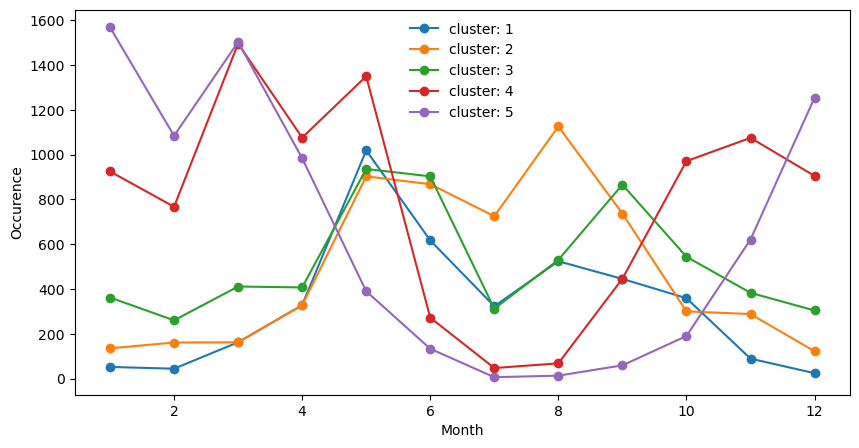

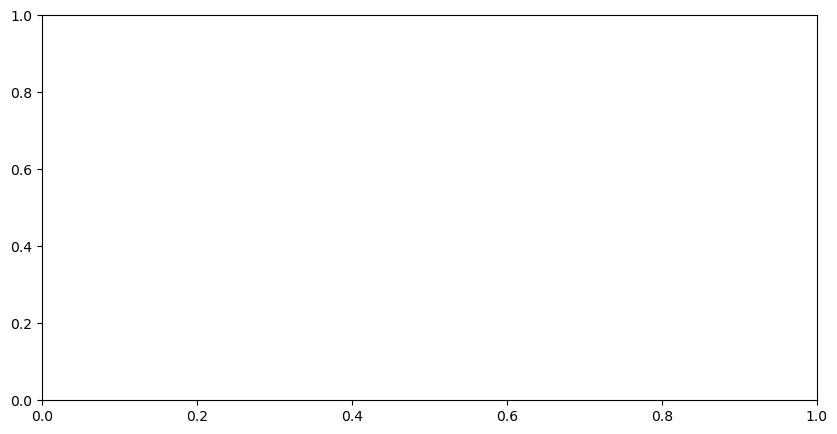

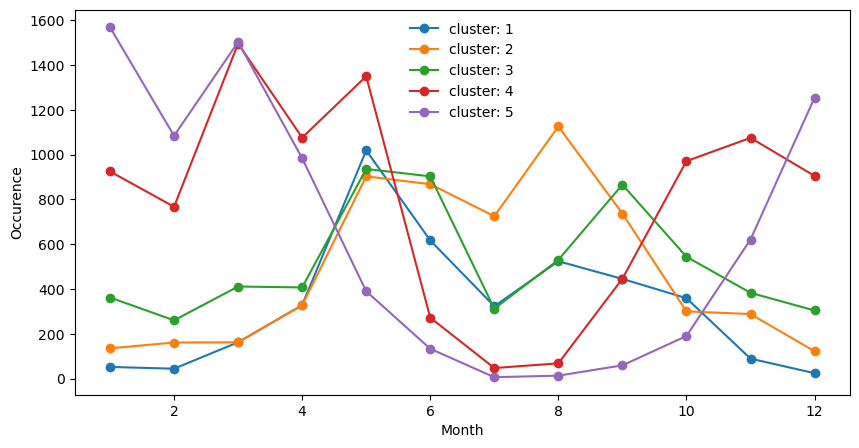

In [23]:
# Create a temporary copy of cluster-assigned data (normalized)
df_norm_clustered_1h_mean_copy = df_norm_clustered_1h_mean.copy()


fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)

fig, ax = plt.subplots(figsize=(10,5))

# Make stack plot from montly resample


fig, ax = plt.subplots(figsize=(10,5))

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()
    
    # Create a cloumn called month in dataframe
    df_cluster.loc[:,'month'] =  df_cluster.index.month
    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()
    
    ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], 'o-', label='cluster: '+str(cluster))
    ax.set_xlabel('Month')
    ax.set_ylabel('Occurence')
    ax.legend(frameon=False)




# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index, df_cluster_count.iloc[:,0], '-', label='cluster: '+str(cluster))
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Frequency')
#     ax.legend(frameon=False) 
    
# fig, ax = plt.subplots(figsize=(10,5))


# # Normalized

# for cluster in clusters:
#     df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
#     df_cluster = df_cluster.copy()
    
#     # Create a column called day of year (DoY) which gives the day of the year 1 to 366
#     df_cluster.loc[:,'DoY'] = df_cluster.index.dayofyear
    
#     # Calculate the occurence of cluster "cluster" per month
#     df_cluster_count = df_cluster.groupby('DoY').count()
    
#     # Plot the occurence of cluster X vs the day of year
#     ax.plot(df_cluster_count.index,
#             df_cluster_count.iloc[:,0]/df_cluster_count.iloc[:,0].max(),
#             '-', label='cluster: '+str(cluster))
    
#     ax.set_xlabel('Day of Year')
#     ax.set_ylabel('Normalized Frequency')
#     ax.legend(frameon=False) 
    



In [24]:
df_clusters_month = pd.DataFrame(columns=clusters)
print(df_clusters_month)

for cluster in clusters:
    df_cluster = df_norm_clustered_1h_mean_copy[df_norm_clustered_1h_mean_copy['clusters'] == cluster]
    df_cluster = df_cluster.copy()    
    df_cluster.loc[:,'month'] =  df_cluster.index.month    
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count = df_cluster.groupby('month').count()    
    monthly_occurance = df_cluster_count.iloc[:,0].values
    print(monthly_occurance)
    df_clusters_month[cluster] = monthly_occurance
    
df_clusters_month['total_freq'] = df_clusters_month.sum(axis=1)
df_clusters_month = df_clusters_month.div(df_clusters_month['total_freq'], axis=0)    

Empty DataFrame
Columns: [1, 2, 3, 4, 5]
Index: []
[  52   44  162  328 1019  617  323  524  445  359   89   24]
[ 135  161  162  327  903  868  725 1126  737  300  288  122]
[362 260 411 407 936 903 312 530 866 544 383 304]
[ 925  767 1496 1076 1350  272   47   68  446  971 1075  905]
[1569 1084 1503  984  390  133    6   13   59  190  621 1254]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sept'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

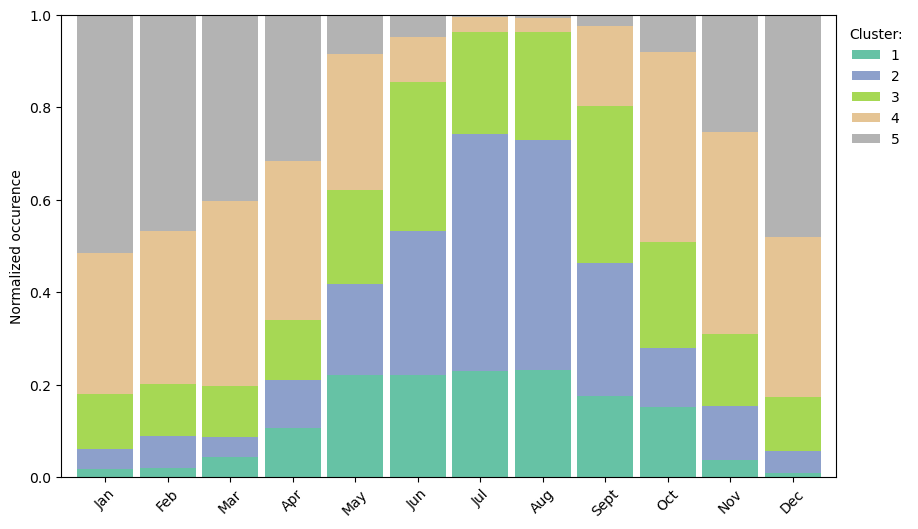

In [25]:
df_clusters_month[clusters].plot(kind='bar', 
                    stacked=True, 
                    colormap='Set2',
                    width = 0.9,            
                    figsize=(10, 6))



plt.ylabel("Normalized occurence")
plt.ylim(0,1)
plt.legend(title = 'Cluster:',frameon=False,bbox_to_anchor=(1, 1))
plt.xticks(np.arange(0, 12, 1), month_names,)
plt.xticks(rotation = 45)


In [26]:
df_cluster.loc[:,'date'] = df_cluster.index.map(datetime.datetime.toordinal) 
df_cluster.loc[:,'date'] = df_cluster.loc[:,'date'] - df_cluster.loc[:,'date'][0] + 1

In [31]:
df_cluster.head(200)

,norm5.623,norm6.31,norm7.079,norm7.943,norm8.913,norm10.0,norm11.22,norm12.589,norm14.125,norm15.849,...,norm281.838,norm316.228,norm354.813,norm398.107,norm446.684,norm501.187,norm562.341,clusters,month,date
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-11-10 14:00:00,8.814771e-32,8.806540e-32,1.526653e-03,5.651385e-02,2.001745e-02,8.761513e-32,8.748203e-32,8.731699e-32,8.711479e-32,1.877685e-04,...,1.000000,0.788006,0.461971,0.209467,0.071633,0.020455,0.010849,5,11,1
2010-11-10 15:00:00,7.630002e-32,7.623053e-32,7.615223e-32,7.606395e-32,7.596438e-32,7.585209e-32,7.572532e-32,7.556885e-32,1.136435e-02,3.272546e-02,...,1.000000,0.819851,0.438771,0.166469,0.048278,0.023547,0.013259,5,11,1
2010-11-10 18:00:00,8.758191e-32,8.750215e-32,8.741227e-32,8.731094e-32,8.719666e-32,8.706777e-32,8.692227e-32,8.675804e-32,8.655750e-32,1.835775e-04,...,1.000000,0.925054,0.550283,0.225450,0.061144,0.017015,0.010281,5,11,1
2010-11-10 19:00:00,8.643139e-32,8.635249e-32,8.626357e-32,8.616333e-32,8.605027e-32,8.592276e-32,8.577882e-32,8.561634e-32,8.543278e-32,8.522552e-32,...,1.000000,0.895665,0.505707,0.213123,0.079151,0.027203,0.011460,5,11,1
2010-11-10 20:00:00,1.007579e-31,1.006657e-31,1.005619e-31,1.004448e-31,1.003127e-31,1.001591e-31,9.998777e-32,2.517339e-02,4.803660e-02,5.787596e-02,...,1.000000,0.903210,0.523902,0.221635,0.072875,0.017467,0.007412,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-01-01 16:00:00,9.017864e-32,1.071115e-02,4.617994e-02,8.746581e-04,2.524014e-02,3.501748e-02,5.458107e-02,4.452696e-02,3.888858e-02,3.798252e-02,...,0.643680,0.427216,0.279459,0.165341,0.096919,0.051661,0.033240,5,1,53
2011-01-03 00:00:00,1.036177e-31,1.035254e-31,1.034214e-31,1.033042e-31,1.031720e-31,8.541859e-04,2.792170e-03,2.651730e-03,1.258542e-02,2.707579e-02,...,0.838514,0.676731,0.307422,0.112618,0.073249,0.069238,0.052620,5,1,55
2011-01-03 01:00:00,9.276195e-32,9.267939e-32,9.258637e-32,9.248149e-32,9.236323e-32,9.379494e-32,9.364185e-32,9.345370e-32,1.764409e-02,4.146790e-02,...,0.958283,0.427569,0.160271,0.086104,0.074978,0.041503,0.027184,5,1,55


### Make nice MJJ trend

In [ ]:
df_trend = df_norm_clustered_1h_mean_copy.copy()

# df_trend['Month'] = df_trend.index
# df_trend['Year']  =
dt_array = df_trend.index.values
df_trend['dtObjects'] = dt_array
df_trend['month_year'] = pd.to_datetime(df_trend['dtObjects']).dt.to_period('M')
df_trend['month'] = df_trend['dtObjects'].dt.month
df_trend['year'] = df_trend['dtObjects'].dt.year

clusters = [1, 2, 3, 4, 5]

# Create a dataframe from dictionaries as sometimes ther might not be any cluster 3 for example in some month --> 
# Problem that when we group by month-year we don't get the 

list_of_dicts = []
for cluster in clusters:
    df_cluster = df_trend[df_trend['clusters'] == cluster]
    df_cluster = df_cluster.copy()    
    #print(cluster)   
    # Calculate the occurence of cluster "cluster" per month
    df_cluster_count  = df_cluster.groupby('month_year').count()    
    monthly_occurance = df_cluster_count.iloc[:,0].values
    
    
    dict_cluster = dict(zip(df_cluster_count.index, monthly_occurance))
    
    #print(dict_cluster)
    list_of_dicts.append(dict_cluster)
    #print(list_of_dicts)

# ds is a dataframe whcih contains the rows = cluster no, and rows equal to month-year. 
df_clusters_seqMonth = pd.DataFrame(list_of_dicts)
#     print(monthly_occurance)
#     df_clusters_seqmonth[cluster] = monthly_occurance


In [ ]:
type(df_trend.index.values)

In [ ]:
# The days that have zero count get a Nan values that should be replaced by 0
df_clusters_seqMonth = df_clusters_seqMonth.replace(np.nan, 0)

df_clusters_seqMonth.loc['total'] = df_clusters_seqMonth.sum(axis=0)

In [ ]:
df_clusters_seqMonth

In [ ]:
str(df_clusters_seqMonth.columns.values[0])
datetimes = [pd.to_datetime(str(x)) for x in list(df_clusters_seqMonth.columns.values)]

In [ ]:
# Transform the data frame so clusters are columns 
df_T = df_clusters_seqMonth.T
df_T.index = datetimes
df_T['month'] = df_T.index.month

In [ ]:
df_T.columns = ['1','2','3','4','5','total', 'month']
df_T_summer = df_T[df_T.month.isin([5,6,7])] # Choosing the months

In [ ]:
df_T_summer = df_T_summer.sort_index()

In [ ]:
df_norm_summer = df_T_summer[['1', '2', '3', '4', '5']].div(df_T_summer['total'], axis=0)

In [ ]:
df_norm_summer.head()

In [ ]:
# Trend for MJJ

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df_norm_summer.index,df_norm_summer['1'].values,'o' )
ax.set_ylabel('Normalized frequency')
ax.set_xlabel('Datetime')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))

#-----------Choosing the clusters---------------------------

cluster_name = '2'


ax.plot(df_norm_summer.index,
        df_norm_summer[cluster_name].values,
        'o',label='original data') 
ax.set_ylabel('Normalized frequency')
ax.set_xlabel('Datetime')
plt.show()

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = np.arange(len(df_norm_summer.index))
vary = df_norm_summer[cluster_name].values

# # # mask = ~np.isnan(varx) & ~np.isnan(vary)
# res = sc.stats.linregress(varx, vary)

# print(f"R-squared: {res.rvalue**2:.6f}")

# fig, ax = plt.subplots(figsize=(10,5))
# plt.plot(varx,
#          vary,
#          'o', label='original data')
# plt.plot(varx,
#          res.intercept + res.slope*varx,
#          'r-', label='fitted line')
# plt.legend()
# plt.show()    
# plt.ylabel('N_tot')
# plt.xlabel('N_tot_calc')


# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

# medslope :Theil slope.
# medintercept : Intercept of the Theil line, as median(y) - medslope*median(x).
# lo_slope : Lower bound of the confidence interval on medslope.
# up_slope : Upper bound of the confidence interval on medslope.

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(varx, vary, 'b.',label='original data')
ax.plot(varx, intercept + slope * varx, 'b-')

ax.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence $')
plt.show()
ax.legend()

# Test the sign of the slope



In [ ]:
df_norm_summer['year'] = df_norm_summer.index.year
df_norm_summer['year'] = df_norm_summer['year'] - df_norm_summer['year'].iloc[0]
df_norm_summer['month'] = df_norm_summer.index.month
df_norm_summer['month_ordered'] = df_norm_summer['year']*12 + df_norm_summer['month'] 
df_norm_summer['month_ordered'] = df_norm_summer['month_ordered'] - df_norm_summer['month_ordered'].iloc[0] + 1

In [ ]:
df_norm_summer

In [ ]:
#slice
df_norm_summer = df_norm_summer[df_norm_summer.index.year < 2018]

In [ ]:
cluster_name = '2'

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = df_norm_summer['month_ordered'].values
vary = df_norm_summer[cluster_name].values

# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

plt.rcParams['font.size'] = '15'
# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'x-', ls=':')
ax.set_ylabel('NPF events (normalized hours)')

ax2 = ax.twiny()
ax2.plot(varx, intercept + slope * varx, 'b-', ls='-', alpha=1, 
         label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
ax2.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence')
#ax.set_ylim(0,1)
ax2.set_xticks([])
ax2.set_title('Cluster 2: Trend MJJ')

for ax in [ax, ax2]:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.legend(frameon=False)

# no = 10
# t = pd.date_range(start='2011-05-01',
#                   end='2021-05-01',
#                   periods=11)
# x_val_months = range(1,122,11)

#ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

plt.ylim(0, 1)






In [ ]:
cluster_name = '1'

# Fit a lin regression slope is not what we want -we don't want correlation -we want trend
varx = df_norm_summer['month_ordered'].values
vary = df_norm_summer[cluster_name].values

# For trend analysis we use theil zen slope
slope, intercept, lo_slope, up_slope  = sc.stats.theilslopes(vary, varx, 0.95)

print('---------------------------')
print('Theil-Sen slope')
print('Slope:',slope)
print('Intercept:',intercept)
print('Lower bound of the confidence interval on medslopeLower:',lo_slope)
print('Upper bound of the confidence interval on medslopeLower:',up_slope)
print('---------------------------')

# Plot the Theil-Sen slope (non-parametric)
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(111)
ax.plot(df_norm_summer.index, df_norm_summer[cluster_name].values, 'rx-', ls=':')
ax.set_ylabel('NPF events (normalized hours)')

ax2 = ax.twiny()
ax2.plot(varx, intercept + slope * varx, 'r-', ls='-', alpha=1, 
         label='y = '+str( round(slope, 3) )+'x +' +str(round(intercept,3) ))
ax2.fill_between(varx, 
               intercept + up_slope * varx,
               intercept + lo_slope * varx,
               alpha=0.2, label= '95% Confidence',
                facecolor = 'r')
#ax.set_ylim(0,1)
ax2.set_xticks([])
ax2.set_title('Cluster 1: Trend MJJ')

for ax in [ax, ax2]:
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.legend(frameon=False)

# no = 10
# t = pd.date_range(start='2011-05-01',
#                   end='2021-05-01',
#                   periods=11)
# x_val_months = range(1,122,11)

#ax.set_xticks(df_norm_summer['month_ordered'].values[::6],  df_norm_summer.index[::6])

plt.ylim(0, 1)




## Discussion

If normalization is not applied, differences in particle number concentration are also taken into account which too could be considered a feature of the distribution. For example NPF event implies a high number concntration of ultra-fine particles. Clustering the non-normalized size distributions was however unsuccesful in terms of physically unreasonable size distributions for each cluster.

K-means: cluster by normalized vs non-normalized: Non-norm did not work but using the normalized distributions means that important features of the distribution signifying NPF event are lost (very high numb conc of ultrafine particles). Other methods for classyifying the DMPS data may prove helpful -**such as....?** and could be investigated in future studies. Unsupervised algoritms are hard to measure perfomance on.

Noteworthy: Dall ost dunn index very close to zero= Isn't that the worts possible??? 0 worst and higher = better?

inertia https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/

In [ ]:

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
 
# loading the dataset
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.50, random_state=0)
 
# K-Means
kmeans = KMeans(n_clusters=4, random_state=1).fit(X)
 
# we store the cluster labels
labels = kmeans.labels_
 
print(davies_bouldin_score(X, labels))

## References
Dall´Osto, M., Beddows, D., Tunved, P. et al. Arctic sea ice melt leads to atmospheric new particle formation. Sci Rep 7, 3318 (2017). https://doi.org/10.1038/s41598-017-03328-1